In [1]:
import numpy as np
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
WNlemma = nltk.WordNetLemmatizer()
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the data
data = pd.read_csv('fake_job_postings.csv')
target = data['fraudulent']

## Exploratory Data Analysis

In [3]:
print((data.isna().sum()/len(data))*100)
#drop department and salary_range because it have about 60 persent null values and removing irrelavent data from the dataset
data.drop(['job_id','salary_range','department','benefits'],axis=1,inplace=True)

job_id                  0.000000
title                   0.000000
location                1.935123
department             64.580537
salary_range           83.959732
company_profile        18.501119
description             0.005593
requirements           15.072707
benefits               40.324385
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        19.412752
required_experience    39.429530
required_education     45.329978
industry               27.421700
function               36.101790
fraudulent              0.000000
dtype: float64


In [4]:
data.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


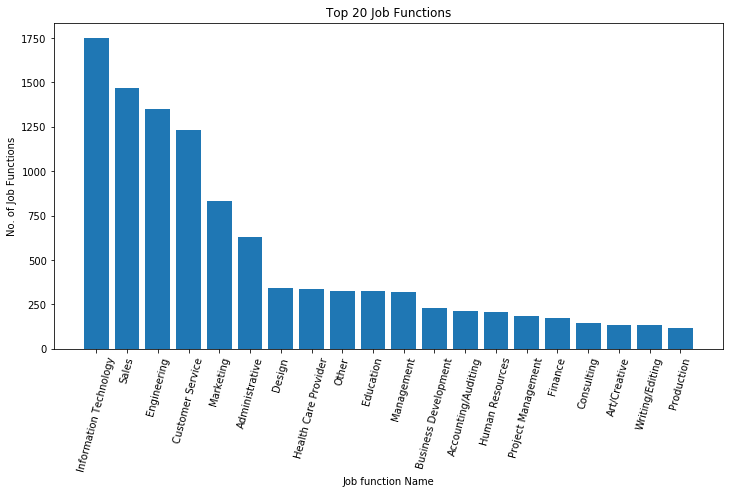

In [5]:
#Plotting the bar plot jobs funtion counts
plt.figure(figsize=(12,6))
plt.bar(data.function.value_counts().index[:20],data.function.value_counts()[:20])
plt.title('Top 20 Job Functions')
plt.xlabel('Job function Name')
plt.ylabel("No. of Job Functions")
degrees = 75
plt.xticks(rotation=degrees)
plt.show()

Text(0, 0.5, 'Industry Name')

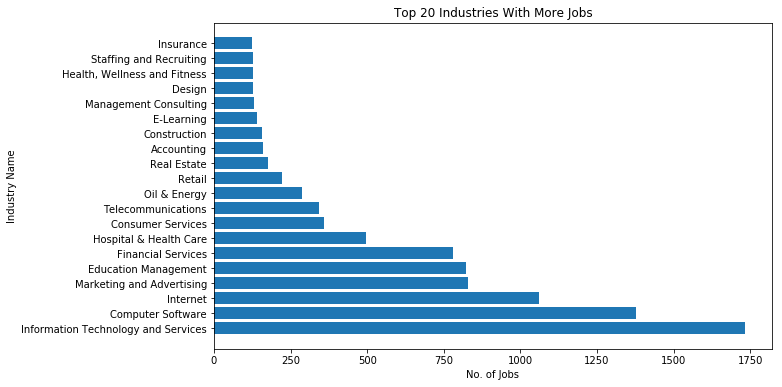

In [6]:
#plot top 20 industries which give most of job posting
plt.figure(figsize=(10,6))
plt.barh(data.industry.value_counts()[:20].index,data.industry.value_counts()[:20])
plt.title('Top 20 Industries With More Jobs')
plt.xlabel('No. of Jobs')
plt.ylabel("Industry Name")

In [7]:
#separate both data to analyse them
fradulent_data = data[data.fraudulent==1]
non_fradulent_data = data[data.fraudulent==0]

print('Number of fake Job description: ',len(fradulent_data))
print('Number of correct job description: ',len(non_fradulent_data))

Number of fake Job description:  866
Number of correct job description:  17014


In [8]:
#Missing values in fake jobs data
fradulent_data.isna().sum()/866*100

title                   0.000000
location                2.193995
company_profile        67.782910
description             0.115473
requirements           17.782910
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        27.829099
required_experience    50.230947
required_education     52.078522
industry               31.755196
function               38.914550
fraudulent              0.000000
dtype: float64

In [9]:
#missing values in correct jobs
non_fradulent_data.isna().sum()/len(non_fradulent_data)*100

title                   0.000000
location                1.921947
company_profile        15.992712
description             0.000000
requirements           14.934760
telecommuting           0.000000
has_company_logo        0.000000
has_questions           0.000000
employment_type        18.984366
required_experience    38.879746
required_education     44.986482
industry               27.201128
function               35.958622
fraudulent              0.000000
dtype: float64

In [10]:
#removing target values form dataset
data.drop(['fraudulent'],axis=1,inplace=True)

In [11]:
data.columns

Index(['title', 'location', 'company_profile', 'description', 'requirements',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function'],
      dtype='object')

# Cleaning and preprocessing the data

In [12]:
import re
def remove_links(text):
    text  = re.sub(r'http://[\w|\S]+',' ',str(text))
    return text

In [13]:
def lower_text(text):
    text = str(text)
    text = ' '.join(x.lower() for x in text.split())
    return text

In [14]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
def remove_stopWords(text):
    text = str(text)
    text = ''.join( x for x in text if x.split() not in stop)
    return(text)

In [15]:
def remove_non_imp_words(series):
    most_freq = pd.Series(' '.join(series).split()).value_counts()[:30]
    less_freq = pd.Series(' '.join(series).split()).value_counts()[-30:]
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in most_freq))
    series = series.apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
    return series

def remove_nan(text):
    if text == 'nan' or text == '':
        text = 'not given'
    return text

In [16]:
def data_cleaning(feature):
    feature = feature.apply(lambda x : remove_links(x))
    feature = feature.apply(lambda x : lower_text(x))
    feature = feature.apply(lambda x : remove_stopWords(x))
    feature = feature.str.replace('[^\w\s]',' 111')
    feature = remove_non_imp_words(feature)
    feature = feature.apply(lambda x: ' '.join([WNlemma.lemmatize(word) for word in x.split()]))
    feature = feature.apply(lambda x : remove_nan(x))
    return feature


In [17]:
#filling null values 
data['required_education'].fillna('no_info_about_education',inplace = True)
data['employment_type'].fillna('no_info_about_employment',inplace = True)
data['required_experience'].fillna('experience_not_asked',inplace = True)
data['industry'].fillna('industry_not_given',inplace = True)
data['function'].fillna('function_not_given',inplace = True)

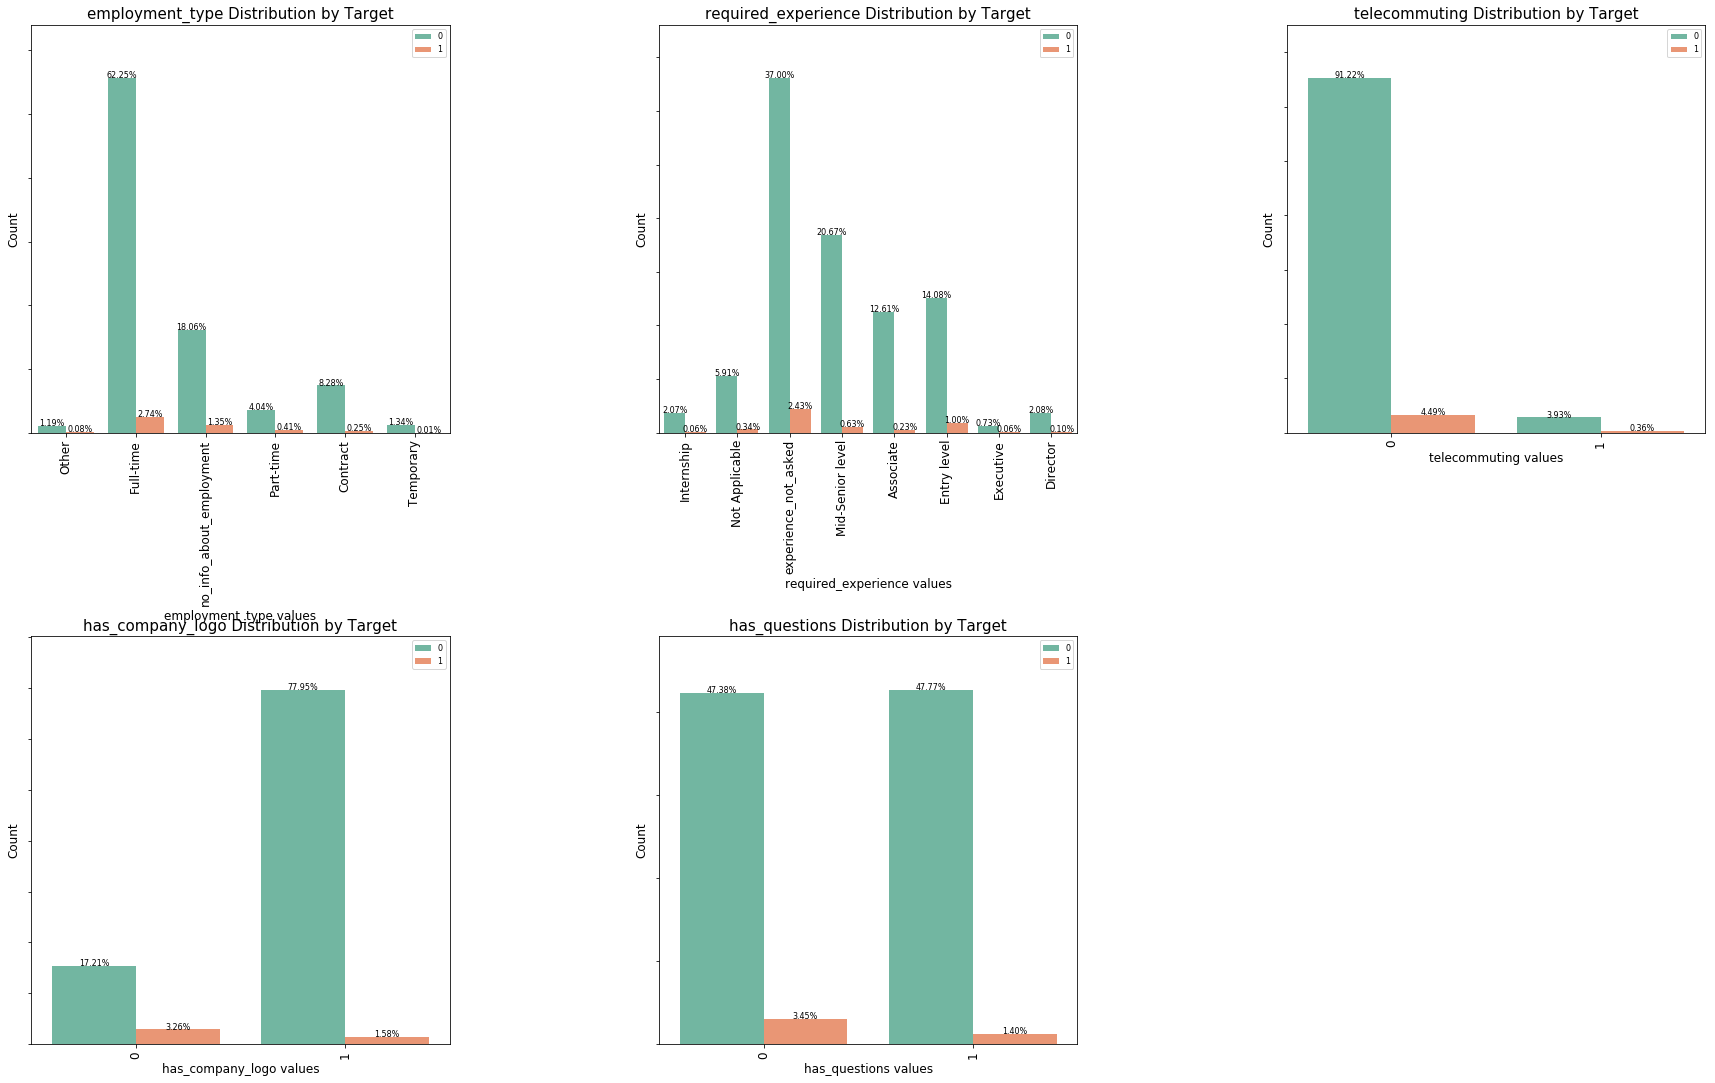

In [82]:
import matplotlib.gridspec as gridspec # to do the grid of plots
grid = gridspec.GridSpec(3, 3, wspace=0.5, hspace=0.5) # The grid of chart
plt.figure(figsize=(30,30))

df=data[['employment_type','required_experience',"telecommuting", "has_company_logo", "has_questions"]]
dff=['employment_type','required_experience',"telecommuting", "has_company_logo", "has_questions"]]]
#sns.boxplot(x=data['industry'].unique())

for n,col in enumerate(df[dff]):
    
    ax = plt.subplot(grid[n]) # feeding the figure of grid
    sns.countplot(x=col, data=df, hue=target, palette='Set2') 
    ax.set_ylabel('Count', fontsize=12) # y axis label
    ax.set_title(f'{col} Distribution by Target', fontsize=15) # title label
    ax.set_xlabel(f'{col} values', fontsize=12) # x axis label
    xlabels = ax.get_xticklabels() 
    ylabels = ax.get_yticklabels() 
    ax.set_xticklabels(xlabels,  fontsize=12)
    ax.set_yticklabels(ylabels,  fontsize=10)
    plt.legend(fontsize=8)
    plt.xticks(rotation=90) 
    total = len(df)
    
    sizes=[] # Get highest values in y
    for p in ax.patches: # loop to all objects
        height = p.get_height()
        sizes.append(height)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=8) 
    ax.set_ylim(0, max(sizes) * 1.15) #set y limit based on highest heights


    
   





In [18]:
#dealing with company profile feature
for i in range(len(data.company_profile)):
    if data.company_profile[i]=='NaN':
        data.company_profile[i] = 'company_profile_not_given'
    else:
        data.company_profile[i] = 'company_profile_given'

C:\Users\Ajay Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
#dealing catogorical data
cat_cols = ['employment_type','required_experience','required_education','industry','function','company_profile']
for c in cat_cols:
    encoded = pd.get_dummies(data[c])
    data = pd.concat([data,encoded],axis = 1 )
cat_cols = ['employment_type','required_experience','required_education','industry','function','title','location','company_profile']
data.drop(cat_cols,axis=1,inplace=True)
print(data.columns)

Index(['description', 'requirements', 'telecommuting', 'has_company_logo',
       'has_questions', 'Contract', 'Full-time', 'Other', 'Part-time',
       'Temporary',
       ...
       'Quality Assurance', 'Research', 'Sales', 'Science',
       'Strategy/Planning', 'Supply Chain', 'Training', 'Writing/Editing',
       'function_not_given', 'company_profile_given'],
      dtype='object', length=204)


In [21]:
#dealing with text data
description = data['description']+ ' ' +  data['requirements']
#data.drop(['description','requirements'],axis=1,inplace=True)
description = data_cleaning(description)
#description

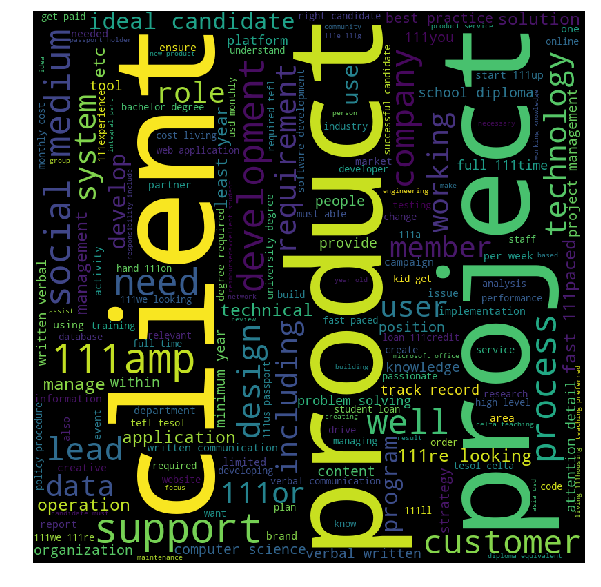

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop, 
                min_font_size = 10).generate("".join(description)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [23]:
tfidf = TfidfVectorizer( min_df = 0.05, ngram_range=(1,3))
tfidf_features = tfidf.fit_transform(description) 
tfidf_vect_df = pd.DataFrame(tfidf_features.todense(), columns = tfidf.get_feature_names())
data = pd.concat([data, tfidf_vect_df], axis = 1)
data.drop(['description','requirements'],axis = 1 , inplace = True)

In [25]:
data.shape

(17880, 727)

In [83]:
data.head()

,title,location,company_profile,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,no_info_about_education,industry_not_given,Marketing
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,no_info_about_education,Marketing and Advertising,Customer Service
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,no_info_about_employment,experience_not_asked,no_info_about_education,industry_not_given,function_not_given
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider
